In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

In [13]:
DATASET = 'mnist'
# DATASET = 'wine_quality'

if DATASET == 'mnist':
    DATASET_STR = 'MNIST'
elif DATASET == 'wine_quality':
    DATASET_STR = 'Wine Quality'

# CLUSTER_METHOD = 'KMeans'
CLUSTER_METHOD = 'GMM'

In [14]:
def get_curves(df):
    valid_curves = []
    for i, row in df.iterrows():
        valid_curves.append(eval(row['validation_scores']))
    max_i = max([len(curve) for curve in valid_curves])
    valid_curve_mean = np.zeros(max_i)
    valid_curve_std = np.zeros(max_i)
    for i in range(max_i):
        vals = []
        for curve in valid_curves:
            if i < len(curve):
                vals.append(curve[i])
            else:
                vals.append(curve[-1])
        valid_curve_mean[i] = np.mean(vals)
        valid_curve_std[i] = np.std(vals)
    return valid_curve_mean, valid_curve_std
# def get_curves(df):
#     valid_curves = []
#     for i, row in df.iterrows():
#         valid_curves.append(json.loads(row['validation_scores']))
#     max_i = max([len(curve) for curve in valid_curves])
#     valid_curve_mean = np.zeros(max_i)
#     valid_curve_std = np.zeros(max_i)
#     for i in range(max_i):
#         vals = []
#         for curve in valid_curves:
#             if i < len(curve):
#                 vals.append(curve[i])
#         valid_curve_mean[i] = np.mean(vals)
#         valid_curve_std[i] = np.std(vals)
#     return valid_curve_mean, valid_curve_std

In [15]:
curves = {
    CLUSTER_METHOD: get_curves(pd.read_csv(f'results/step_5/{DATASET}/{CLUSTER_METHOD}_metrics.csv'))
    for CLUSTER_METHOD in ['KMeans', 'GMM']
}
df = pd.read_csv(f'results/step_4/{DATASET}/baseline_metrics.csv')
curves['baseline'] = get_curves(df)

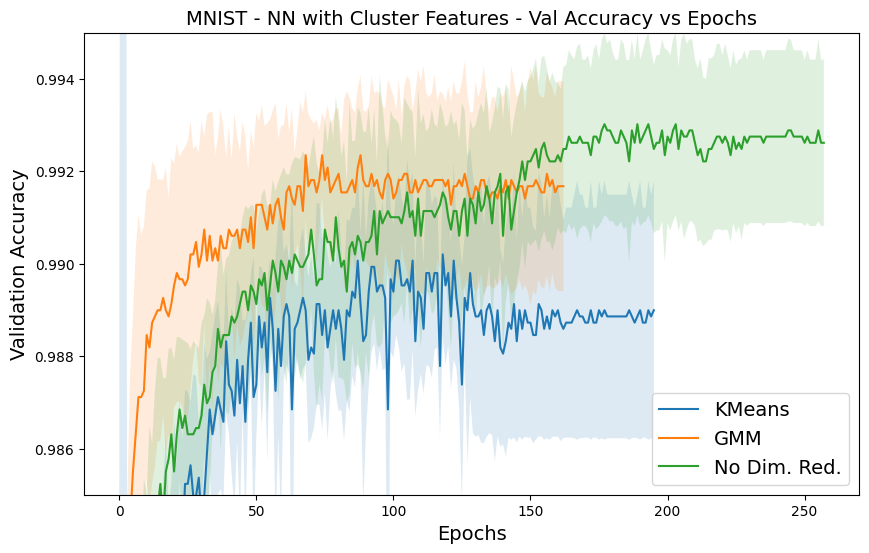

In [31]:
plt.figure(figsize=(10, 6))
for method, (valid_curve_mean, valid_curve_std) in curves.items():
    if method == 'baseline':
        method = 'No Dim. Red.'
    plt.plot(valid_curve_mean, label=method)
    plt.fill_between(range(len(valid_curve_mean)), valid_curve_mean-valid_curve_std, valid_curve_mean+valid_curve_std, alpha=0.15)

fontsize = 14
plt.xlabel('Epochs', fontsize=fontsize)
plt.ylabel('Validation Accuracy', fontsize=fontsize)

plt.ylim(0.985, 0.995)
plt.legend(fontsize=fontsize)
plt.title(f'{DATASET_STR} - NN with Cluster Features - Val Accuracy vs Epochs', fontsize=fontsize)

path = f'figures/step_5/{DATASET}.png'
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path)

In [26]:
metrics_df = pd.DataFrame()
for i, method in enumerate(['KMeans', 'GMM', 'baseline']):
    if method == 'baseline':
        df = pd.read_csv(f'results/step_4/{DATASET}/baseline_metrics.csv')
    else:
        df = pd.read_csv(f'results/step_5/{DATASET}/{method}_metrics.csv')

    training_time_mean = df['training_time'].mean()
    training_time_std = df['training_time'].std()
    eval_time_mean = df['evaluation_time'].mean()
    eval_time_std = df['evaluation_time'].std()

    metrics_df.loc[i, 'Method'] = method
    metrics_df.loc[i, 'Training Time Mean'] = training_time_mean
    metrics_df.loc[i, 'Training Time Std'] = training_time_std
    metrics_df.loc[i, 'Evaluation Time Mean'] = eval_time_mean
    metrics_df.loc[i, 'Evaluation Time Std'] = eval_time_std

    valid_curve_mean, valid_curve_std = get_curves(df)
    metrics_df.loc[i, 'Validation Accuracy'] = valid_curve_mean.max()
metrics_df.to_csv(f'~/temp/step_5/metrics.csv', index=False)
metrics_df.style.hide(axis='index')

Method,Training Time Mean,Training Time Std,Evaluation Time Mean,Evaluation Time Std,Validation Accuracy
KMeans,4.069423,0.919542,0.001977,0.001738,0.990201
GMM,3.795515,0.754062,0.001263,0.000718,0.992349
baseline,5.193384,1.665813,0.001188,0.000548,0.993020
